# Spotify Listening History processing

## Read all records

In [25]:
%pip install pandas
%pip install matplotlib
import pandas as pd


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import glob, json

FILE_PATTERN = 'raw-data/Streaming_History_Audio*.json'
all_streams = []
for file_path in glob.glob(FILE_PATTERN):
    with open(file_path, 'r') as file:
        all_streams += json.loads(file.read())

print(len(all_streams))

155484


## Create Dataframe

In [10]:
all_streams_df = pd.DataFrame(all_streams)

In [11]:
all_streams_df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-11-18T18:24:32Z,OS X 10.15.7 [x86 8],292160,DO,148.255.149.45,Under the Dome,Jinjer,King of Everything,spotify:track:6ppr7ZI25sqVTfL9a5BmBh,None,None,None,trackdone,trackdone,False,False,False,NaN,False
1,2020-11-18T18:28:45Z,OS X 10.15.7 [x86 8],253826,DO,148.255.149.45,Dip a Sail,Jinjer,King of Everything,spotify:track:3Q8ppNjpCKdnzx6dkr8iPT,None,None,None,trackdone,trackdone,False,False,False,NaN,False
2,2020-11-18T18:33:53Z,OS X 10.15.7 [x86 8],305571,DO,148.255.149.45,Pisces,Jinjer,King of Everything,spotify:track:5t8NXa2fugcTPsTfhVILmS,None,None,None,trackdone,trackdone,False,False,False,NaN,False
3,2020-11-18T18:36:00Z,OS X 10.15.7 [x86 8],126782,DO,148.255.149.45,Beggars' Dance,Jinjer,King of Everything,spotify:track:6NcS85K1ZlXAZecBL6msRa,None,None,None,trackdone,trackdone,False,False,False,NaN,False
4,2020-11-18T18:41:39Z,OS X 10.15.7 [x86 8],192074,DO,148.255.149.45,On the Top,Jinjer,Macro,spotify:track:69nWy17LLDqW5DcgDc37hq,None,None,None,clickrow,endplay,False,False,False,NaN,False


### Select columns of interest

In [12]:
all_streams_df = all_streams_df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name']]
all_streams_df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name
0,2020-11-18T18:24:32Z,292160,Under the Dome,Jinjer,King of Everything
1,2020-11-18T18:28:45Z,253826,Dip a Sail,Jinjer,King of Everything
2,2020-11-18T18:33:53Z,305571,Pisces,Jinjer,King of Everything
3,2020-11-18T18:36:00Z,126782,Beggars' Dance,Jinjer,King of Everything
4,2020-11-18T18:41:39Z,192074,On the Top,Jinjer,Macro


In [14]:
all_streams_df = all_streams_df.rename(columns={"ts": "timestamp", "master_metadata_track_name": "track_name", "master_metadata_album_artist_name": "artist_name", "master_metadata_album_album_name": "album_name"})
all_streams_df.head()

,timestamp,ms_played,track_name,artist_name,album_name
0,2020-11-18T18:24:32Z,292160,Under the Dome,Jinjer,King of Everything
1,2020-11-18T18:28:45Z,253826,Dip a Sail,Jinjer,King of Everything
2,2020-11-18T18:33:53Z,305571,Pisces,Jinjer,King of Everything
3,2020-11-18T18:36:00Z,126782,Beggars' Dance,Jinjer,King of Everything
4,2020-11-18T18:41:39Z,192074,On the Top,Jinjer,Macro


### Convert timestamp to date format

In [39]:
all_streams_df['timestamp'] = pd.to_datetime(all_streams_df['timestamp'])
all_streams_df.head()

,timestamp,ms_played,track_name,artist_name,album_name
0,2020-11-18 18:24:32+00:00,292160,Under the Dome,Jinjer,King of Everything
1,2020-11-18 18:28:45+00:00,253826,Dip a Sail,Jinjer,King of Everything
2,2020-11-18 18:33:53+00:00,305571,Pisces,Jinjer,King of Everything
3,2020-11-18 18:36:00+00:00,126782,Beggars' Dance,Jinjer,King of Everything
4,2020-11-18 18:41:39+00:00,192074,On the Top,Jinjer,Macro


In [79]:
twenty_twenty_streams = all_streams_df.loc[all_streams_df["timestamp"].dt.year == 2024]
twenty_twenty_streams

,timestamp,ms_played,track_name,artist_name,album_name
109779,2024-08-19 10:47:38+00:00,235600,Pressure,Muse,Simulation Theory
109780,2024-08-19 10:51:30+00:00,231466,Cold Reactor,Everything Everything,Mountainhead
109781,2024-08-19 10:53:48+00:00,137760,A-Punk,Vampire Weekend,Vampire Weekend
109782,2024-08-19 11:20:00+00:00,171729,Any Way You Want It,Journey,Departure
109783,2024-08-19 11:36:16+00:00,219418,Un abrazo,Weas pero con música,Un abrazo
...,...,...,...,...,...
155479,2024-08-19 01:49:55+00:00,112023,Synopsis,Mountain Eye,Synopsis
155480,2024-08-19 10:33:30+00:00,49182,At the Seams,Zeal & Ardor,Wake of a Nation
155481,2024-08-19 10:37:39+00:00,249600,Don't Stop Believin' (2022 Remaster),Journey,Escape
155482,2024-08-19 10:40:24+00:00,164186,Something Good Can Work,Two Door Cinema Club,Tourist History


## My 20 most listened to artists

In [80]:
most_listened_artists = twenty_twenty_streams.groupby(["artist_name"])['ms_played'].agg("sum").reset_index().sort_values(by=["ms_played"], ascending=False)
top_ten = most_listened_artists.iloc[:5]
rest_of_artists = pd.DataFrame({
    'artist_name': ['Others'],
    'ms_played': [most_listened_artists.iloc[5:]['ms_played'].sum()]
})

result = pd.concat([top_ten, rest_of_artists], ignore_index=True)

<Axes: title={'center': 'Top 5 artists per time listened'}, ylabel='ms_played'>

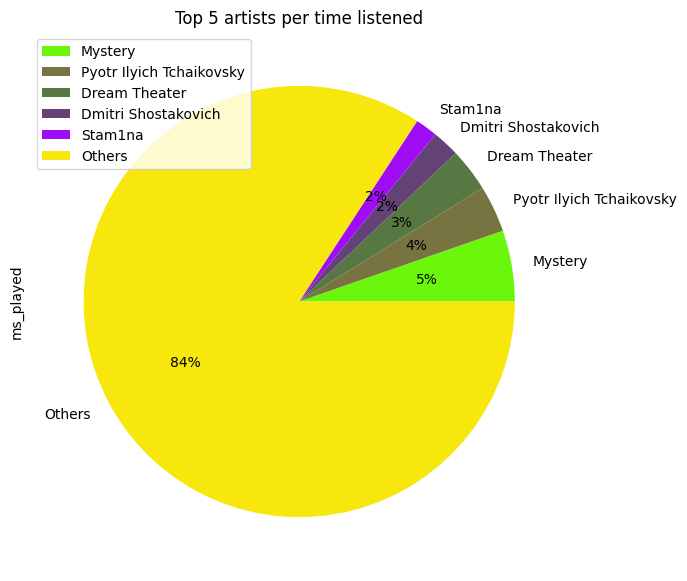

In [93]:
result = result.set_index(result['artist_name'])
colors = ["#6AF70C", "#787442", "#577842", "#644278", "#A10CF7", "#F7E70C"]
result.plot.pie(y="ms_played", title="Top 5 artists per time listened", figsize=(7,7), autopct='%1.0f%%', colors=colors)
